In [1]:
import numpy
import scipy.stats
import seaborn

seaborn.set_context('talk')

# TCL, distribución de estadísticos, estimación puntual y por intervalos

## Generación de datos

1. Generamos **1** realización de una muestra aleatoria $X_1,  ... X_n$ (de tamaño *n*).

$X_1,  ..., X_n$ (i.i.d.) con cada $X_i$ con distribución conocida (mejor, **no** normal).
Por ejemplo, *Poisson*.
Graficamos la distribución de la muestra.

2. Luego, tenemos **1** realización del estadístico $\overline{X} = \frac{1}{n} \sum_{i=1}^{n} X_i$.

Promedio de la muestra = 4.932, una realización del estadístico media muestral


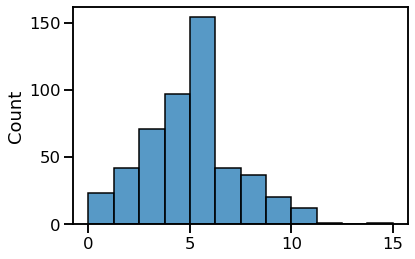

In [2]:
# Generación de muestras de una distribución Poisson.
n = 500
poisson_lambda = 5

# Realización de una muestra aleatoria X_1 ... X_n (de tamaño n).
sample = scipy.stats.poisson.rvs(poisson_lambda, size=n)

seaborn.histplot(sample, bins=12)

print(f'Promedio de la muestra = {sample.mean()}, una realización del estadístico media muestral')

1. Generamos **N** realizaciones de una muestra aleatoria $X_1, ..., X_n$ (de tamaño *n*).

$X_1, ..., X_n$ (i.i.d.) con cada $X_i$ con distribución **no** normal.
Por ejemplo, *Poisson*.
Elegir una realización y graficar la distribución de la muestra.

2. Luego, tendríamos **N** realizaciones del estadístico $\overline{X} = \frac{1}{n} \sum_{i=1}^{n} X_i$.

Graficar la distribución de estas realizaciones (de las medias muestrales).
¿Se parece a una distribución normal?

In [3]:
# Generación de muestras de una distribución Poisson.

# N filas
N = 400
# n columnas
n = 1000

poisson_lambda = 5

# N realizaciones de una muestra aleatoria X_1 ... X_n (tamaño n).
samples = scipy.stats.poisson.rvs(poisson_lambda, size=(N, n))

[5 8 4 5] ... [6 8 7 5]
Promedio de la muestra = 5.035


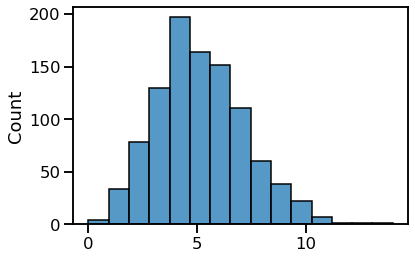

In [4]:
# Primera realización de la muestra aleatoria.
print(f'{samples[0][:4]} ... {samples[0][-5:-1]}')

# Histograma de la i-ésima realización de la muestra aleatoria.
i = 0
seaborn.histplot(samples[i], bins=15)
print(f'Promedio de la muestra = {samples[i].mean()}')

In [5]:
# Calculamos la media para cada una de las muestras.
sample_means = samples.mean(axis=1) # Media de cada fila, tendremos N medias.
sample_means.shape

(400,)

Veamos la distribución de las **N** realizaciones del estadístico $\overline{X} = \frac{1}{n} \sum_{i=1}^{n} X_i$.

Esperanza de la media muestral = 4.997075
Varianza de la media muestral = 0.0049822643750000025


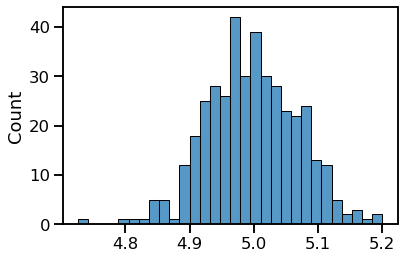

In [6]:
seaborn.histplot(sample_means, bins=30)

print(f'Esperanza de la media muestral = {sample_means.mean()}')
print(f'Varianza de la media muestral = {sample_means.var()}')

Parámetros de una *Poisson*.

$E(Poisson(\lambda)) = \lambda$

$V(Poisson(\lambda)) = \lambda$

Parámetros del estimador *Media Muestral*.

$E(\overline{X}) = \lambda$

$V(\overline{X}) = \frac{\lambda}{n}$

In [7]:
# Documentación de la función norm de scipy.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
# Estima la media y el desvío (los parámetros de una normal).
mu, std = scipy.stats.norm.fit(sample_means)
print(f'Esperanza = {mu}')
print(f'Desvío = {std}')
print(f'Varianza = {std**2}')

Esperanza = 4.997075
Desvío = 0.07058515690285035
Varianza = 0.004982264375000002


## Ejercicio 1

1. Analizar qué pasa cuando crece $n$, y ver la distribución de $\overline{X}= \frac{1}{n} \sum_{i=1}^{n} X_i$ cuando $n\rightarrow \infty$ (el tamaño de la muestra). ¿Qué sucede con la varianza?

2. Realizar el mismo análisis con otra distribución **no** normal, por ejemplo, *exponencial*.

**Respuesta**

La varianza del estadístico **Media Muestral** disminuye en relación al tamaño de la muestra (es decir, de $n$).

Esperanza de la media muestral = 4.9851
Varianza de la media muestral = 0.04927149
Esperanza de la media muestral = 5.000249999999999
Varianza de la media muestral = 0.0050006575
Esperanza de la media muestral = 4.999307
Varianza de la media muestral = 0.0004458849010000007


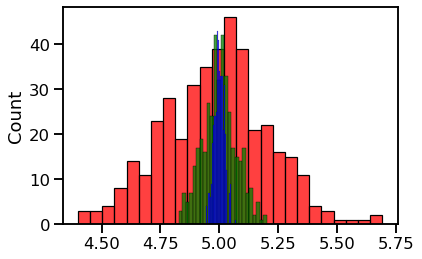

In [8]:
# Generación de muestras de una distribución Poisson.

# N filas
N = 400
# n columnas
n_s = [ (100, 'red')
      , (1000, 'green')
      , (10000, 'blue')
      ]

poisson_lambda = 5

for (n, c) in n_s:
    # N realizaciones de una muestra aleatoria X_1 ... X_n (tamaño n).
    samples = scipy.stats.poisson.rvs(poisson_lambda, size=(N, n))
    # Calculamos la media para cada una de las muestras.
    sample_means = samples.mean(axis=1) # Media de cada fila, tendremos N medias.
    # Visualizamos la distribución del estadístico.
    seaborn.histplot(sample_means, bins=25, color=c)
    print(f'Esperanza de la media muestral = {sample_means.mean()}')
    print(f'Varianza de la media muestral = {sample_means.var()}')

Parámetros de una *Exponencial*.

$E(Exponencial(\lambda)) = \frac{1}{\lambda}$

$V(Exponencial(\lambda)) = \frac{1}{\lambda^{2}}$

Parámetros del estimador *Media Muestral*.

$E(\overline{X}) = \frac{1}{\lambda}$

$V(\overline{X}) = \frac{1}{n \lambda^{2}}$

Esperanza de la media muestral = 0.19939350902663538
Varianza de la media muestral = 0.0003639414162893429
Esperanza de la media muestral = 0.19992980650338846
Varianza de la media muestral = 3.882695655597892e-05
Esperanza de la media muestral = 0.20005387053043083
Varianza de la media muestral = 4.346351113458822e-06


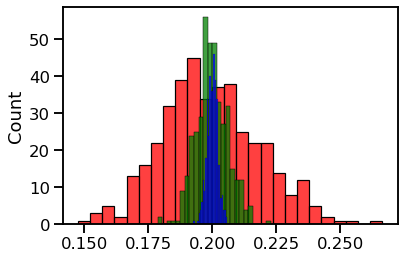

In [9]:
# Generación de muestras de una distribución Exponencial.

# N filas
N = 400
# n columnas
n_s = [ (100, 'red')
      , (1000, 'green')
      , (10000, 'blue')
      ]

exp_lambda = 5

for (n, c) in n_s:
    # N realizaciones de una muestra aleatoria X_1 ... X_n (tamaño n).
    samples = scipy.stats.expon.rvs(scale=1/exp_lambda, size=(N, n))
    # Calculamos la media para cada una de las muestras.
    sample_means = samples.mean(axis=1) # Media de cada fila, tendremos N medias.
    # Visualizamos la distribución del estadístico.
    seaborn.histplot(sample_means, bins=25, color=c)
    print(f'Esperanza de la media muestral = {sample_means.mean()}')
    print(f'Varianza de la media muestral = {sample_means.var()}')

## Ejercicio 2: Estimadores puntuales y por intervalos

0. Fijar *n = 1000*.
1. Dar un estimador puntual de la media de la distribución generada.
2. Dar un intervalo de confianza (*IC*) para la media de nivel asintótico $0.95 = (1 - \alpha)$. Calcular la longitud del intervalo.
3. Dar *N = 1000* realizaciones del intervalo de confianza para la media de nivel *0.95*, y contar cuantos contienen a la media verdadera.
4. Incrementar *n = 4000* (por cuatro) y repetir el paso dos. ¿Qué le pasó a la longitud del *IC*?

In [10]:
# Generación de muestras de una distribución Poisson.
n = 1000
poisson_lambda = 5

# Realización de una muestra aleatoria X_1 ... X_n (tamaño n).
sample = scipy.stats.poisson.rvs(poisson_lambda, size=n)

# Estimador Puntual.
puntual = sample.mean()
print(f'Estimador Puntual = {puntual}')

Estimador Puntual = 5.08


In [11]:
alpha = 0.05

mu = sample.mean()
sigma = sample.std() / numpy.sqrt(n)
print(f'Esperanza del Estimador = {mu}')
print(f'Desviación del Estimador = {sigma}')
print('----------')

intervalo = scipy.stats.norm.interval(1 - alpha, loc=mu, scale=sigma)
print(f'Intervalo de Confianza ({1 - alpha}) = {intervalo}')

i, s = intervalo
print(f'Longitud del IC = {s - i}')

Esperanza del Estimador = 5.08
Desviación del Estimador = 0.0702111102319284
----------
Intervalo de Confianza (0.95) = (4.9423887526308485, 5.217611247369152)
Longitud del IC = 0.27522249473830307


In [12]:
# Generación de muestras de una distribución Poisson.
N = 1000
n = 1000
poisson_lambda = 5

alpha = 0.05

# Probabilidad de contener al parámetro en el IC.
p = 0
for _ in range(N):
    # Realización de una muestra aleatoria X_1 ... X_n (tamaño n).
    sample = scipy.stats.poisson.rvs(poisson_lambda, size=n)

    mu = sample.mean()
    sigma = sample.std() / numpy.sqrt(n)

    i, s = scipy.stats.norm.interval(1 - alpha, loc=mu, scale=sigma)

    if i <= poisson_lambda <= s:
        p += 1

p /= N
print(f'Probabilidad de contener al parámetro en el IC = {p}')

Probabilidad de contener al parámetro en el IC = 0.953


In [13]:
# Generación de muestras de una distribución Poisson.
n = 4000
poisson_lambda = 5

# Realización de una muestra aleatoria X_1 ... X_n (tamaño n).
sample = scipy.stats.poisson.rvs(poisson_lambda, size=n)

# Estimador Puntual.
puntual = sample.mean()
print(f'Estimador Puntual = {puntual}')

Estimador Puntual = 5.07675


In [14]:
alpha = 0.05

mu = sample.mean()
sigma = sample.std() / numpy.sqrt(n)
print(f'Esperanza del Estimador = {mu}')
print(f'Desviación del Estimador = {sigma}')
print('----------')

intervalo = scipy.stats.norm.interval(1 - alpha, loc=mu, scale=sigma)
print(f'Intervalo de Confianza ({1 - alpha}) = {intervalo}')

i, s = intervalo
print(f'Longitud del IC = {s - i}')

Esperanza del Estimador = 5.07675
Desviación del Estimador = 0.034933363127173996
----------
Intervalo de Confianza (0.95) = (5.008281866411879, 5.14521813358812)
Longitud del IC = 0.13693626717624063
